In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import json
import os

from pathlib import Path
from PIL import Image
from dsr import DSRDataset

In [14]:
root = Path('./dsr/')

with open(root / 'train_valid_test_split.json', 'r') as f:
    split = json.load(f)

print('Number of scenes - Train:', len(split['train']))
print('Number of scenes - Valid:', len(split['valid']))
print('Number of scenes - Test:', len(split['test']))

Number of scenes - Train: 100
Number of scenes - Valid: 50
Number of scenes - Test: 50


In [15]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((256, 256)),
    torchvision.transforms.ToTensor()
])

dataset_30 = DSRDataset(root, split['train'], height=30, transform=transform)
dataset_80 = DSRDataset(root, split['train'], height=80, transform=transform)
dataset_140 = DSRDataset(root, split['train'], height=140, transform=transform)

print('Number of samples - 30m:', len(dataset_30))
print('Number of samples - 80m:', len(dataset_80))
print('Number of samples - 140m:', len(dataset_140))

Number of samples - 30m: 255
Number of samples - 80m: 261
Number of samples - 140m: 263


In [9]:
dataset = DSRDataset(root, split['train'], transform=transform)

print('Number of samples - 80m:', len(dataset))

Number of samples - 80m: 2580


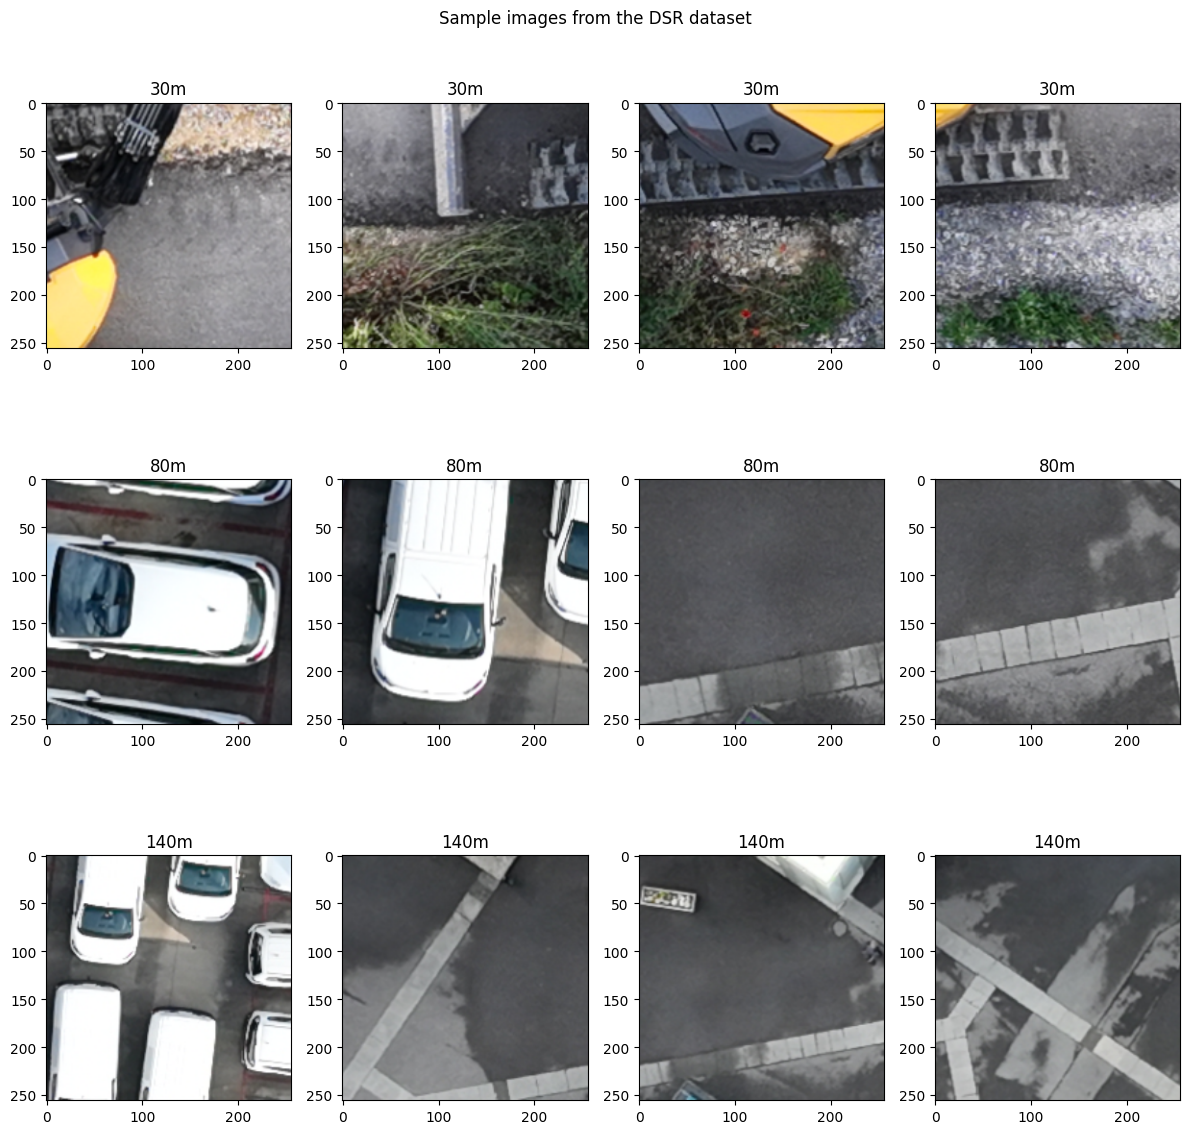

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 4, figsize=(12, 12))
offset = 42

for i in range(4):
    image = dataset_30[i + offset][0]
    axs[0, i].imshow(image.permute(1, 2, 0))
    axs[0, i].set_title('30m')
    
    image = dataset_80[i + offset][0]
    axs[1, i].imshow(image.permute(1, 2, 0))
    axs[1, i].set_title('80m')
    
    image = dataset_140[i + offset][0]
    axs[2, i].imshow(image.permute(1, 2, 0))
    axs[2, i].set_title('140m')

plt.suptitle('Sample images from the DSR dataset')
plt.tight_layout()

Text(0.5, 1.0, 'Target')

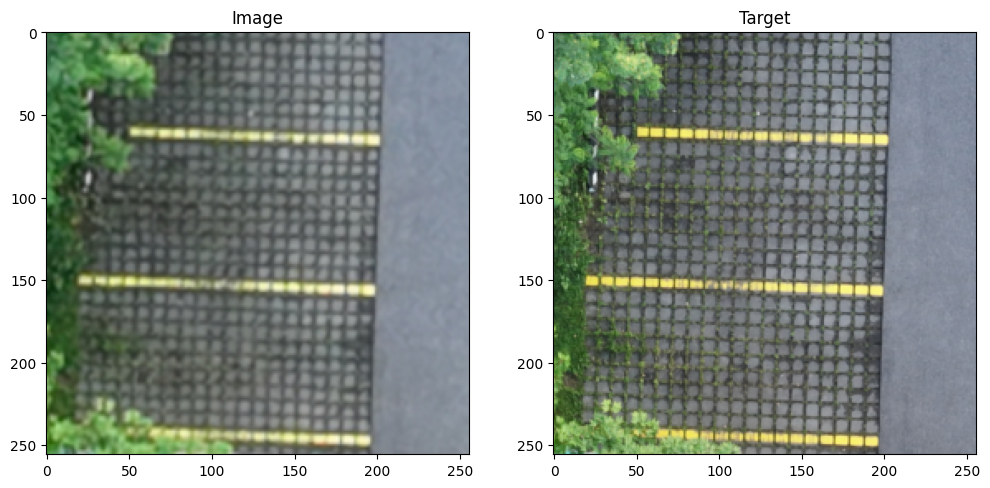

In [11]:
image, target = dataset_140[3]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image.permute(1, 2, 0))
axs[0].set_title('Image')

axs[1].imshow(target.permute(1, 2, 0))
axs[1].set_title('Target')